In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast
from tqdm import tqdm
import warnings; warnings.filterwarnings('ignore')
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_lr)]
    else:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_hr)]
    data = np.array([signal for signal, meta in data])
    return data

In [3]:
path = "C:/Users/79049/Desktop/ptb/"
sampling_rate=100

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

print('data shpae:', X.shape)
Y[['scp_codes']]
Y

100%|██████████| 21837/21837 [12:01<00:00, 30.26it/s] 


data shpae: (21837, 1000, 12)


patient_id   age  sex  height  weight  nurse  site      device  \
ecg_id                                                                   
1          15709.0  56.0    1     NaN    63.0    2.0   0.0   CS-12   E   
2          13243.0  19.0    0     NaN    70.0    2.0   0.0   CS-12   E   
3          20372.0  37.0    1     NaN    69.0    2.0   0.0   CS-12   E   
4          17014.0  24.0    0     NaN    82.0    2.0   0.0   CS-12   E   
5          17448.0  19.0    1     NaN    70.0    2.0   0.0   CS-12   E   
...            ...   ...  ...     ...     ...    ...   ...         ...   
21833      17180.0  67.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21834      20703.0  93.0    0     NaN     NaN    1.0   2.0  AT-60    3   
21835      19311.0  59.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21836       8873.0  64.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21837      11744.0  68.0    0     NaN     NaN    1.0   2.0  AT-60    3   

             recording_date  \
ecg_id                        
1       1984-11-09 09:17:34   
2       1984-11-14 12:55:37   
3       1984-11-15 12:49:10   
4       1984-11-15 13:44:57   
5       1984-11-17 10:43:15   
...                     ...   
21833   2001-05-31 09:14:35   
21834   2001-06-05 11:33:39   
21835   2001-06-08 10:30:27   
21836   2001-06-09 18:21:49   
21837   2001-06-11 16:43:01   

                                                   report  ...  \
ecg_id                                                     ...   
1                  sinusrhythmus periphere niederspannung  ...   
2                     sinusbradykardie sonst normales ekg  ...   
3                              sinusrhythmus normales ekg  ...   
4                              sinusrhythmus normales ekg  ...   
5                              sinusrhythmus normales ekg  ...   
...                                                   ...  ...   
21833   ventrikulÄre extrasystole(n) sinustachykardie ...  ...   
21834   sinusrhythmus lagetyp normal qrs(t) abnorm    ...  ...   
21835   sinusrhythmus lagetyp normal t abnorm in anter...  ...   
21836   supraventrikulÄre extrasystole(n) sinusrhythmu...  ...   
21837   sinusrhythmus p-sinistrocardiale lagetyp norma...  ...   

       validated_by_human  baseline_drift static_noise burst_noise  \
ecg_id                                                               
1                    True             NaN    , I-V1,           NaN   
2                    True             NaN          NaN         NaN   
3                    True             NaN          NaN         NaN   
4                    True    , II,III,AVF          NaN         NaN   
5                    True   , III,AVR,AVF          NaN         NaN   
...                   ...             ...          ...         ...   
21833                True             NaN   , alles,           NaN   
21834                True             NaN          NaN         NaN   
21835                True             NaN   , I-AVR,           NaN   
21836                True             NaN          NaN         NaN   
21837                True             NaN   , I-AVL,           NaN   

        electrodes_problems  extra_beats  pacemaker  strat_fold  \
ecg_id                                                            
1                       NaN          NaN        NaN           3   
2                       NaN          NaN        NaN           2   
3                       NaN          NaN        NaN           5   
4                       NaN          NaN        NaN           3   
5                       NaN          NaN        NaN           4   
...                     ...          ...        ...         ...   
21833                   NaN          1ES        NaN           7   
21834                   NaN          NaN        NaN           4   
21835                   NaN          NaN        NaN           2   
21836                   NaN         SVES        NaN           8   
21837                   NaN          NaN        NaN           9   


In [4]:
# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]
print(agg_df.shape)
agg_df.head()

(44, 12)


description  diagnostic  form  rhythm  \
NDT    non-diagnostic T abnormalities         1.0   1.0     NaN   
NST_          non-specific ST changes         1.0   1.0     NaN   
DIG                  digitalis-effect         1.0   1.0     NaN   
LNGQT                long QT-interval         1.0   1.0     NaN   
NORM                       normal ECG         1.0   NaN     NaN   

      diagnostic_class diagnostic_subclass  \
NDT               STTC                STTC   
NST_              STTC                NST_   
DIG               STTC                STTC   
LNGQT             STTC                STTC   
NORM              NORM                NORM   

                                      Statement Category  \
NDT                    other ST-T descriptive statements   
NST_   Basic roots for coding ST-T changes and abnorm...   
DIG                    other ST-T descriptive statements   
LNGQT                  other ST-T descriptive statements   
NORM                                     Normal/abnormal   

        SCP-ECG Statement Description  AHA code            aECG REFID  \
NDT    non-diagnostic T abnormalities       NaN                   NaN   
NST_          non-specific ST changes     145.0  MDC_ECG_RHY_STHILOST   
DIG         suggests digitalis-effect     205.0                   NaN   
LNGQT                long QT-interval     148.0                   NaN   
NORM                       normal ECG       1.0                   NaN   

      CDISC Code DICOM Code  
NDT          NaN        NaN  
NST_         NaN        NaN  
DIG          NaN        NaN  
LNGQT        NaN        NaN  
NORM         NaN    F-000B7

In [5]:
def aggregate_supclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))
    
# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_supclass_diagnostic)
Y['diagnostic_superclass_len'] = Y['diagnostic_superclass'].apply(len)
Y.loc[Y.diagnostic_superclass_len > 1, 'diagnostic_superclass']

ecg_id
39       [MI, STTC]
45        [HYP, CD]
50         [MI, CD]
77         [MI, CD]
87       [CD, STTC]
            ...    
21815      [MI, CD]
21821    [NORM, CD]
21827    [MI, STTC]
21828    [MI, STTC]
21829    [NORM, CD]
Name: diagnostic_superclass, Length: 5158, dtype: object

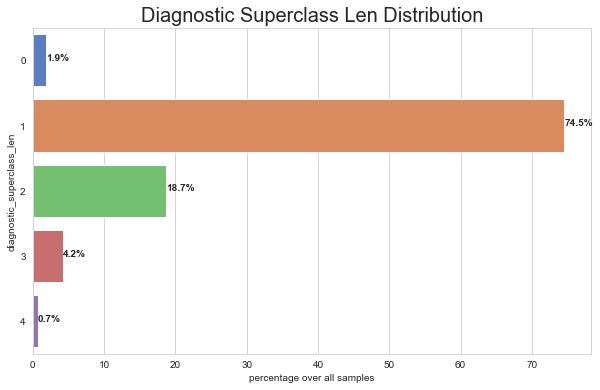

In [6]:
vc = Y['diagnostic_superclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Superclass Len Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_superclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

In [7]:
def aggregate_subclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    ret = list(set(tmp))
    ret = ['sub_'+r for r in ret] # to distinguish between subclass and superclass columns
    return ret

# Apply diagnostic subclass
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_subclass_diagnostic)
Y['diagnostic_subclass_len'] = Y['diagnostic_subclass'].apply(len)
Y.loc[Y.diagnostic_subclass_len > 1, 'diagnostic_subclass']

ecg_id
26                    [sub_STTC, sub_NST_]
28                    [sub_STTC, sub_NST_]
39           [sub_IMI, sub_NST_, sub_STTC]
45       [sub_IRBBB, sub_RAO/RAE, sub_RVH]
50                     [sub_LMI, sub_IVCD]
                       ...                
21821                [sub_IRBBB, sub_NORM]
21827                  [sub_IMI, sub_ISCA]
21828                  [sub_IMI, sub_ISCA]
21829                [sub_IRBBB, sub_NORM]
21832            [sub_LAFB/LPFB, sub_IVCD]
Name: diagnostic_subclass, Length: 6191, dtype: object

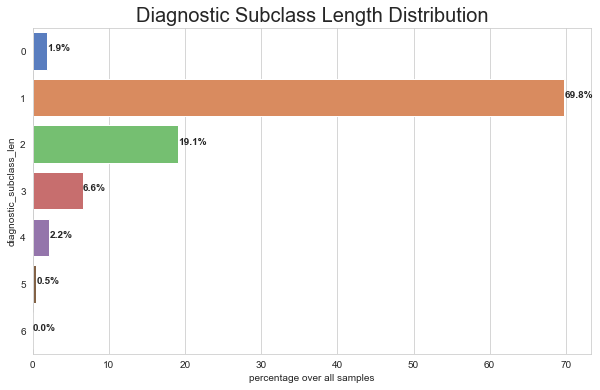

In [8]:
vc = Y['diagnostic_subclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Subclass Length Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_subclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

In [9]:
Y.columns.tolist()

['patient_id',
 'age',
 'sex',
 'height',
 'weight',
 'nurse',
 'site',
 'device',
 'recording_date',
 'report',
 'scp_codes',
 'heart_axis',
 'infarction_stadium1',
 'infarction_stadium2',
 'validated_by',
 'second_opinion',
 'initial_autogenerated_report',
 'validated_by_human',
 'baseline_drift',
 'static_noise',
 'burst_noise',
 'electrodes_problems',
 'extra_beats',
 'pacemaker',
 'strat_fold',
 'filename_lr',
 'filename_hr',
 'diagnostic_superclass',
 'diagnostic_superclass_len',
 'diagnostic_subclass',
 'diagnostic_subclass_len']

In [10]:
all_superclass = pd.Series(np.concatenate(Y['diagnostic_superclass'].values))
all_subclass = pd.Series(np.concatenate(Y['diagnostic_subclass'].values))
superclass_cols = all_superclass.unique()
subclass_cols = all_subclass.unique()
update_cols = np.concatenate([superclass_cols, subclass_cols]) # add meta data columns
meta_cols = ['age', 'sex', 'height', 'weight', 'nurse', 'site', 'device',] # could add more columns as features

In [11]:
class ClassUpdate():
    def __init__(self, cols):
        self.cols = cols

    def __call__(self, row):
        for sc in row['diagnostic_superclass']:
            row[sc] = 1
        for sc in row['diagnostic_subclass']:
            row[sc] = 1
            
        return row

def get_data_by_folds(folds, x, y, update_cols, feature_cols):
    assert len(folds)  > 0, '# of provided folds should longer than 1'
    #print(y.strat_fold)
    filt = np.isin(y.strat_fold.values, folds)
    x_selected = x[filt]
    y_selected = y[filt]
    
    for sc in update_cols:
        y_selected[sc] = 0
        
    cls_updt = ClassUpdate(update_cols)
    
    y_selected = y_selected.apply(cls_updt, axis=1)
    
    return x_selected, y_selected[list(feature_cols)+list(update_cols)+['strat_fold']]

In [12]:
x_all, y_all = get_data_by_folds(np.arange(1, 11), X, Y, update_cols, meta_cols)

In [13]:
y_all

age  sex  height  weight  nurse  site      device  NORM  MI  STTC  \
ecg_id                                                                       
1       56.0    1     NaN    63.0    2.0   0.0   CS-12   E     1   0     0   
2       19.0    0     NaN    70.0    2.0   0.0   CS-12   E     1   0     0   
3       37.0    1     NaN    69.0    2.0   0.0   CS-12   E     1   0     0   
4       24.0    0     NaN    82.0    2.0   0.0   CS-12   E     1   0     0   
5       19.0    1     NaN    70.0    2.0   0.0   CS-12   E     1   0     0   
...      ...  ...     ...     ...    ...   ...         ...   ...  ..   ...   
21833   67.0    1     NaN     NaN    1.0   2.0  AT-60    3     0   0     1   
21834   93.0    0     NaN     NaN    1.0   2.0  AT-60    3     1   0     0   
21835   59.0    1     NaN     NaN    1.0   2.0  AT-60    3     0   0     1   
21836   64.0    1     NaN     NaN    1.0   2.0  AT-60    3     1   0     0   
21837   68.0    0     NaN     NaN    1.0   2.0  AT-60    3     1   0     0   

        ...  sub_ISC_  sub_SEHYP  sub_ISCI  sub_CRBBB  sub_CLBBB  sub_LAO/LAE  \
ecg_id  ...                                                                     
1       ...         0          0         0          0          0            0   
2       ...         0          0         0          0          0            0   
3       ...         0          0         0          0          0            0   
4       ...         0          0         0          0          0            0   
5       ...         0          0         0          0          0            0   
...     ...       ...        ...       ...        ...        ...          ...   
21833   ...         0          0         0          0          0            0   
21834   ...         0          0         0          0          0            0   
21835   ...         0          0         0          0          0            0   
21836   ...         0          0         0          0          0            0   
21837   ...         0          0         0          0          0            0   

        sub_ILBBB  sub_WPW  sub_PMI  strat_fold  
ecg_id                                           
1               0        0        0           3  
2               0        0        0           2  
3               0        0        0           5  
4               0        0        0           3  
5               0        0        0           4  
...           ...      ...      ...         ...  
21833           0        0        0           7  
21834           0        0        0           4  
21835           0        0        0           2  
21836           0        0        0           8  
21837           0        0        0           9  

[21837 rows x 36 columns]

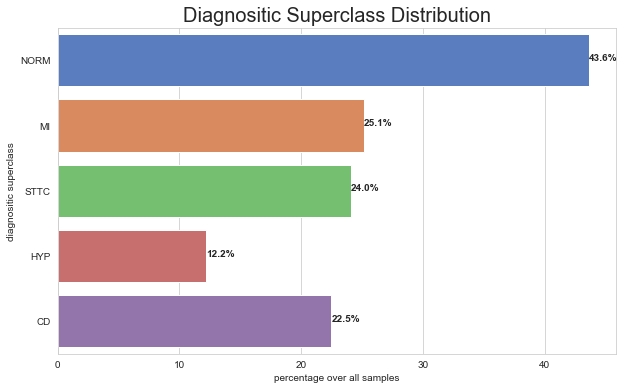

In [14]:
vc = y_all[superclass_cols].sum(axis=0)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnositic Superclass Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnositic superclass")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

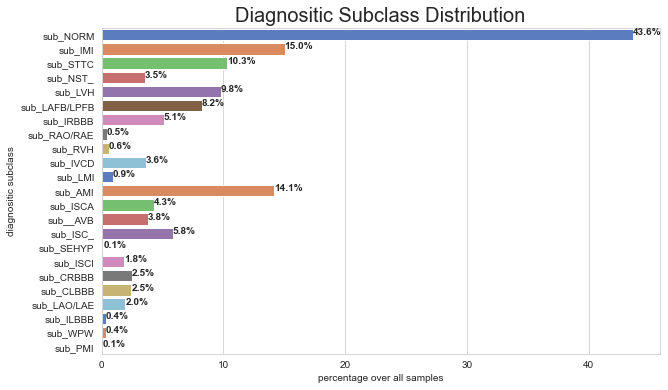

In [15]:
vc = y_all[subclass_cols].sum(axis=0)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnositic Subclass Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnositic subclass")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

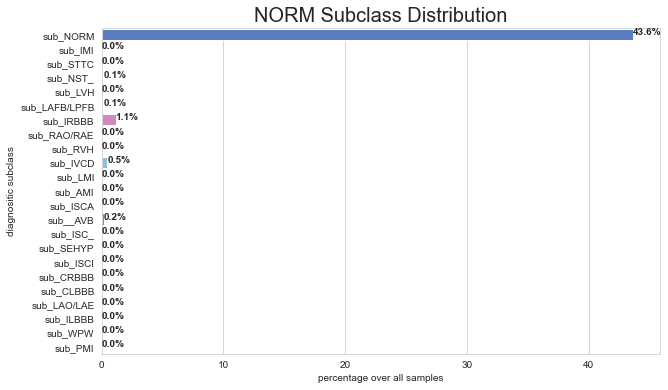

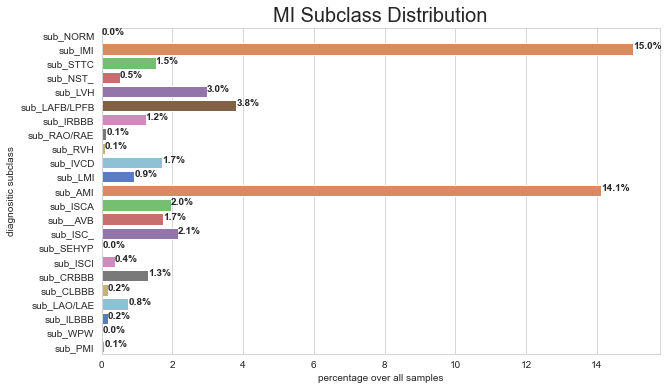

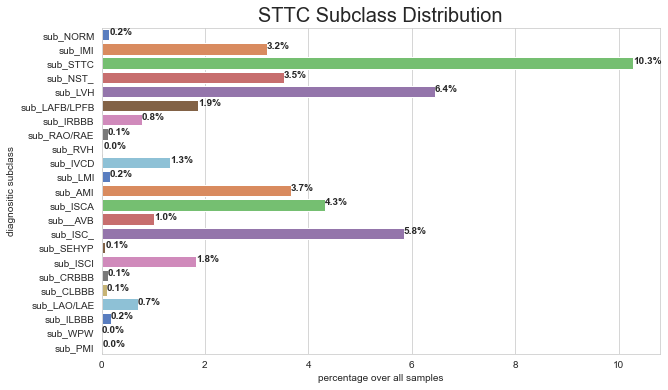

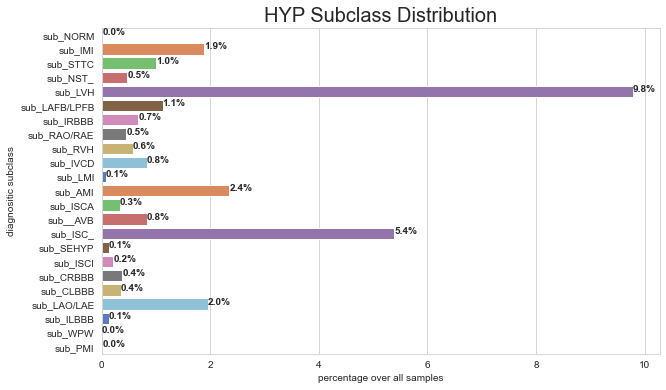

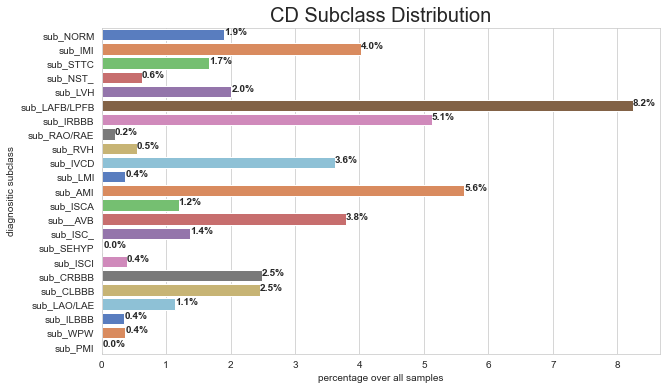

In [16]:
for superclass in superclass_cols:
    
    vc = y_all.loc[y_all[superclass] == 1][subclass_cols].sum(axis=0)
    
    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
    ax.set_title("{} Subclass Distribution".format(superclass), fontsize=20)
    ax.set_xlabel ("percentage over all samples")
    ax.set_ylabel ("diagnositic subclass")
    for rect in ax.patches:
        ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

In [17]:
meta_cols

['age', 'sex', 'height', 'weight', 'nurse', 'site', 'device']

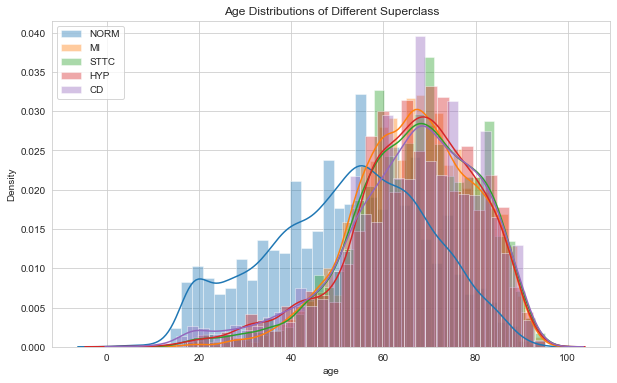

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Age Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1]['age']   
    sns.distplot(data, label=superclass)


plt.legend(loc='upper left')
plt.show()

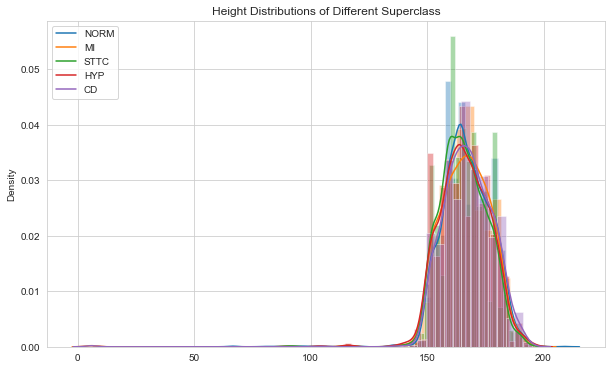

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Height Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1][['height']]
    sns.distplot(data, label=superclass)

plt.legend(labels=superclass_cols, loc='upper left')
plt.show()

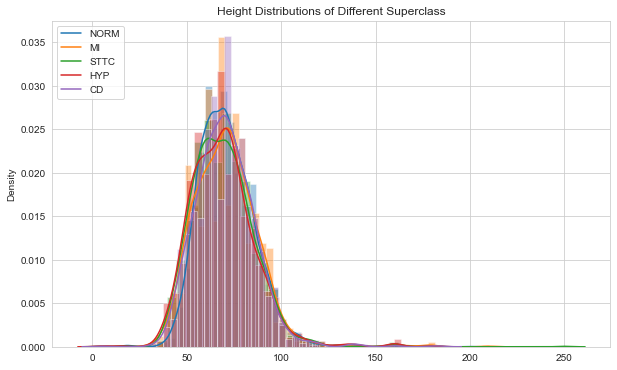

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Height Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1][['weight']]
    sns.distplot(data, label=superclass)

plt.legend(labels=superclass_cols, loc='upper left')
plt.show()

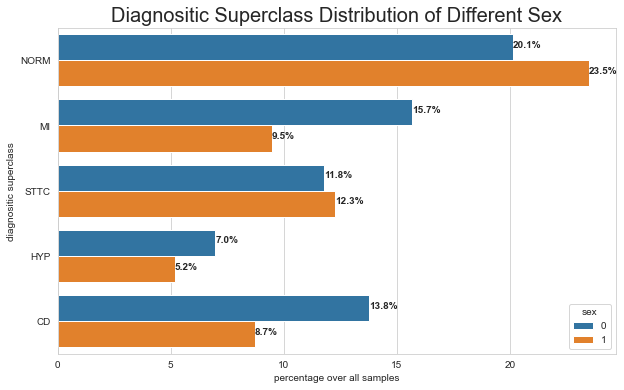

In [22]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
    
ax.set_title("Diagnositic Superclass Distribution of Different Sex", fontsize=20)

all_index, all_count, all_values = [], [], []
for sex in y_all.sex.unique():
    vc = y_all.loc[y_all.sex == sex][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [sex]*len(vc)
    #print(all_sex)
    
df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['sex'] = all_values
    
ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="sex",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold')

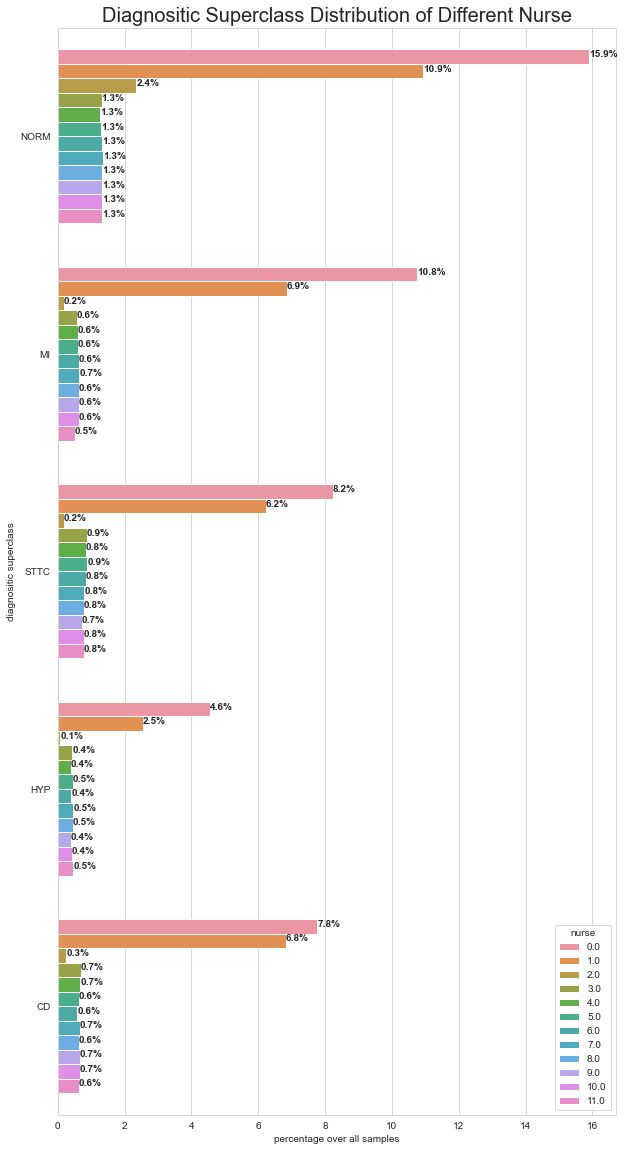

In [23]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,20))
    
ax.set_title("Diagnositic Superclass Distribution of Different Nurse", fontsize=20)

all_index, all_count, all_values = [], [], []
for nurse in y_all.nurse.unique():
    vc = y_all.loc[y_all.nurse == nurse][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [nurse]*len(vc)
    #print(all_sex)
    
df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['nurse'] = all_values
    
ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="nurse",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold')

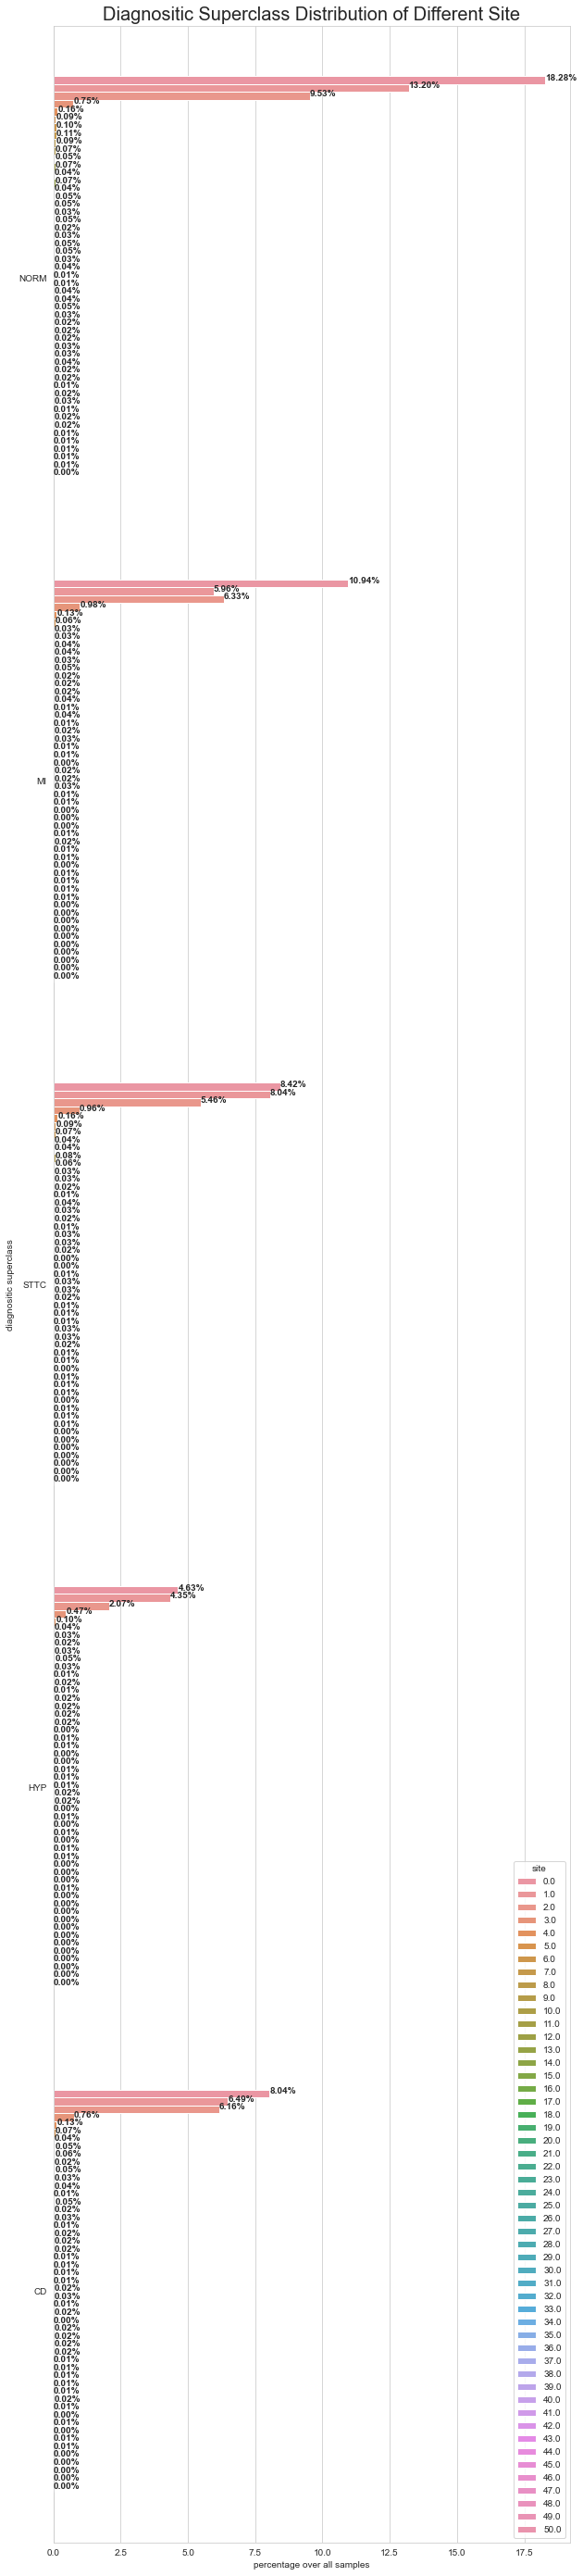

In [24]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,50))
    
ax.set_title("Diagnositic Superclass Distribution of Different Site", fontsize=20)

all_index, all_count, all_values = [], [], []
for site in y_all.site.unique():
    vc = y_all.loc[y_all.site == site][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [site]*len(vc)
    #print(all_sex)
    
df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['site'] = all_values
    
ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="site",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f%%"% rect.get_width(), weight='bold')

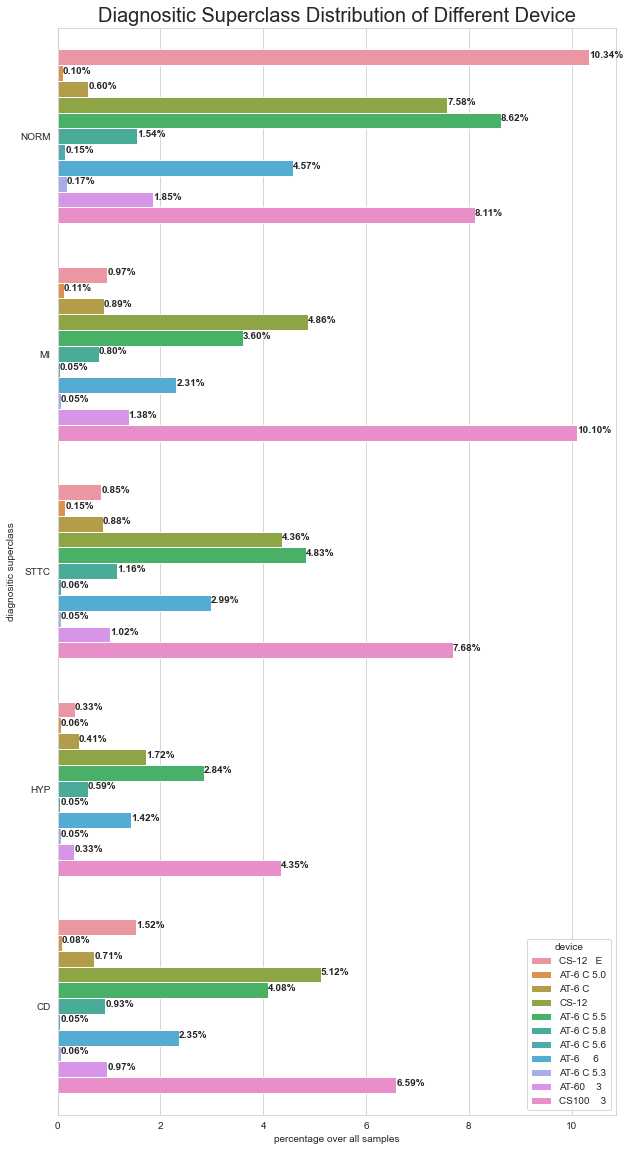

In [25]:

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,20))
    
ax.set_title("Diagnositic Superclass Distribution of Different Device", fontsize=20)

all_index, all_count, all_values = [], [], []
for device in y_all.device.unique():
    vc = y_all.loc[y_all.device == device][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [device]*len(vc)
    #print(all_sex)
    
df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['device'] = all_values

ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="device",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.2f%%"% rect.get_width(), weight='bold')

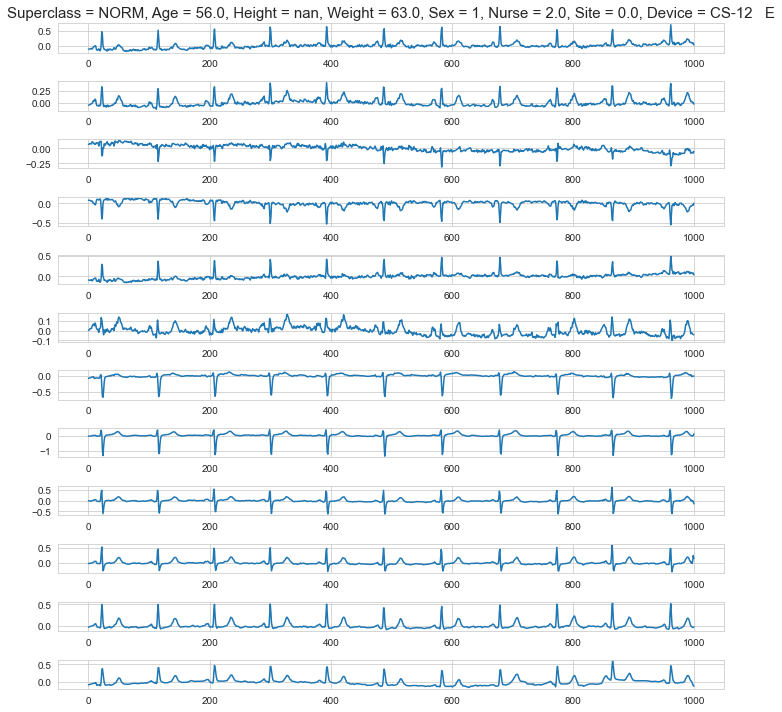

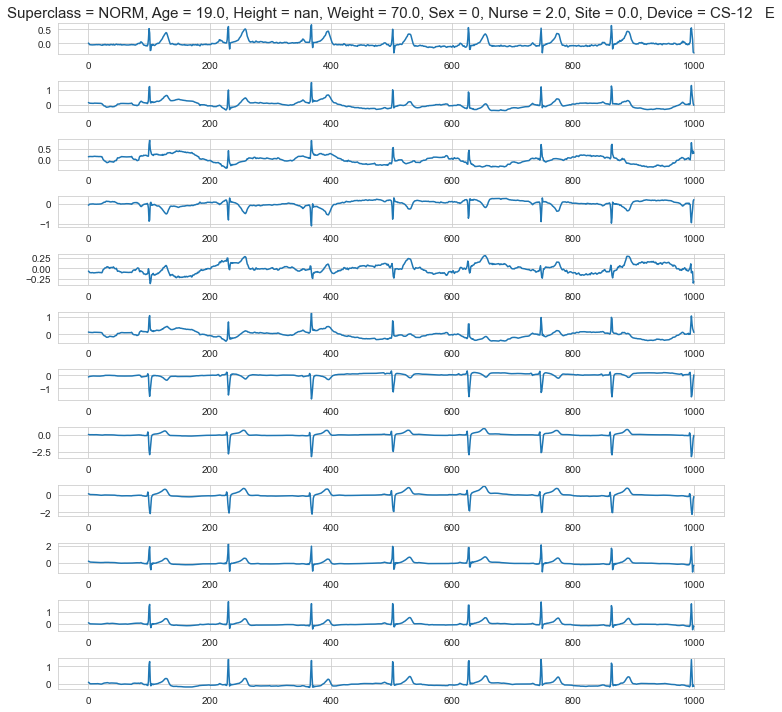

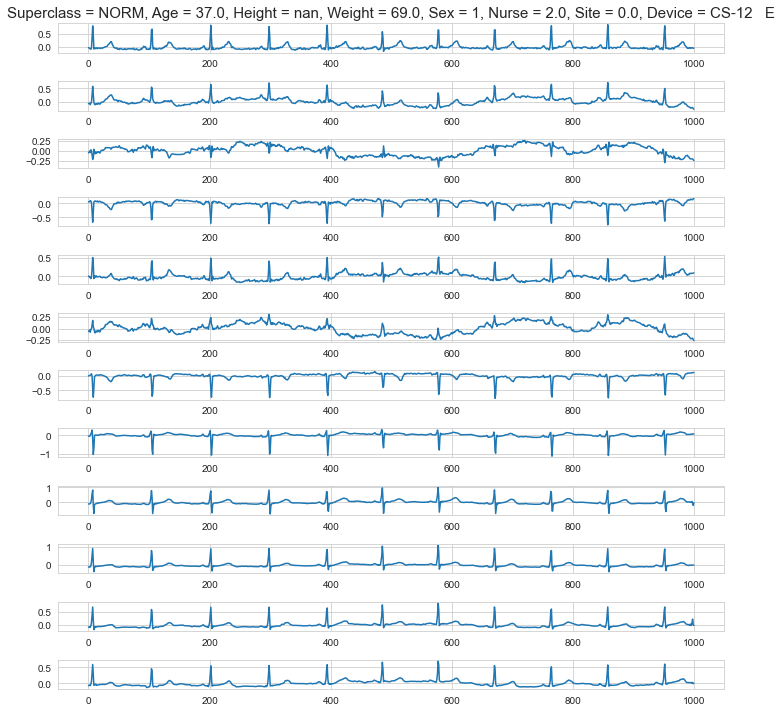

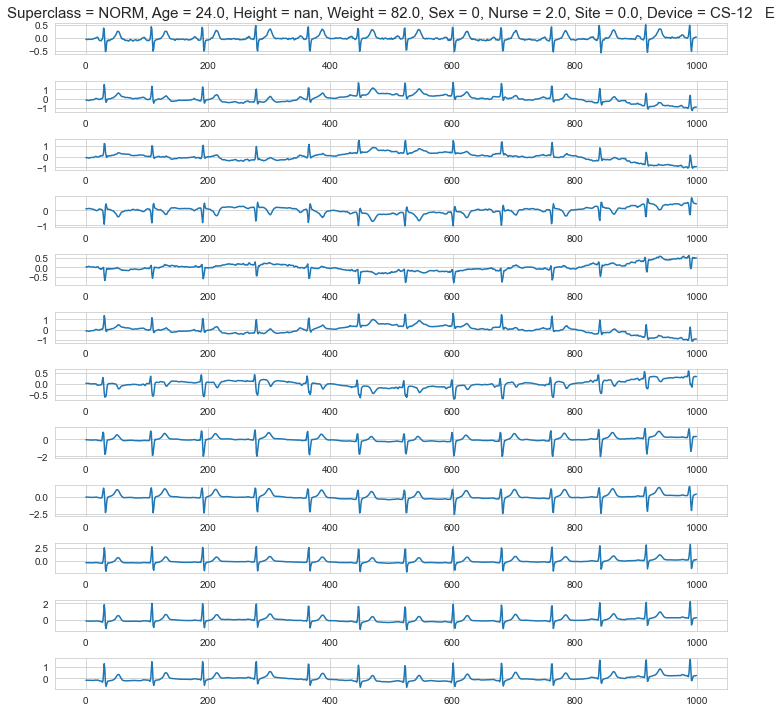

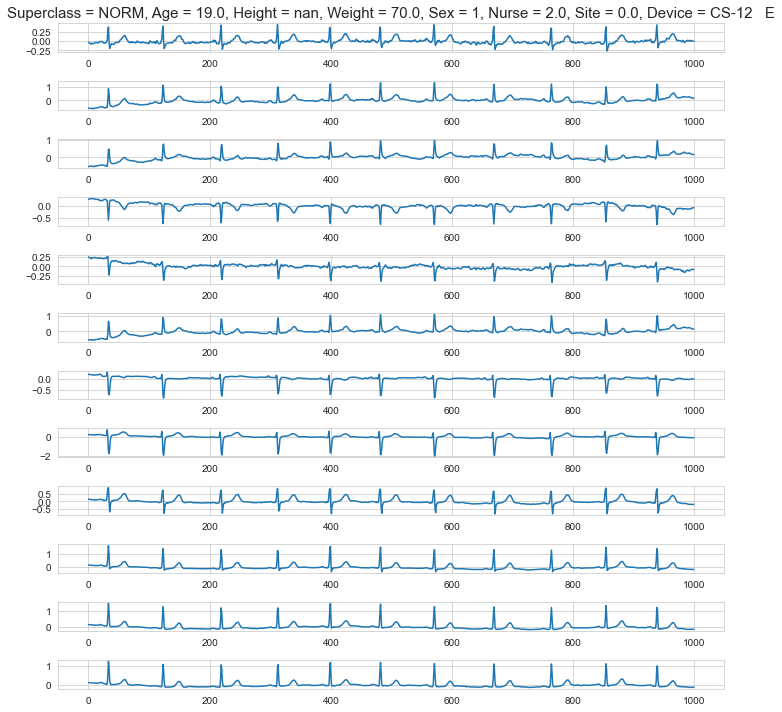

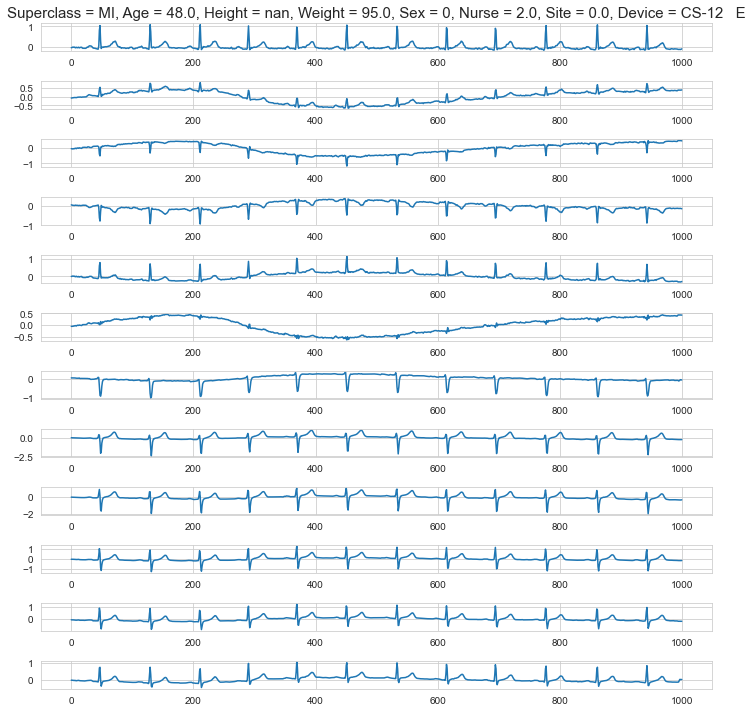

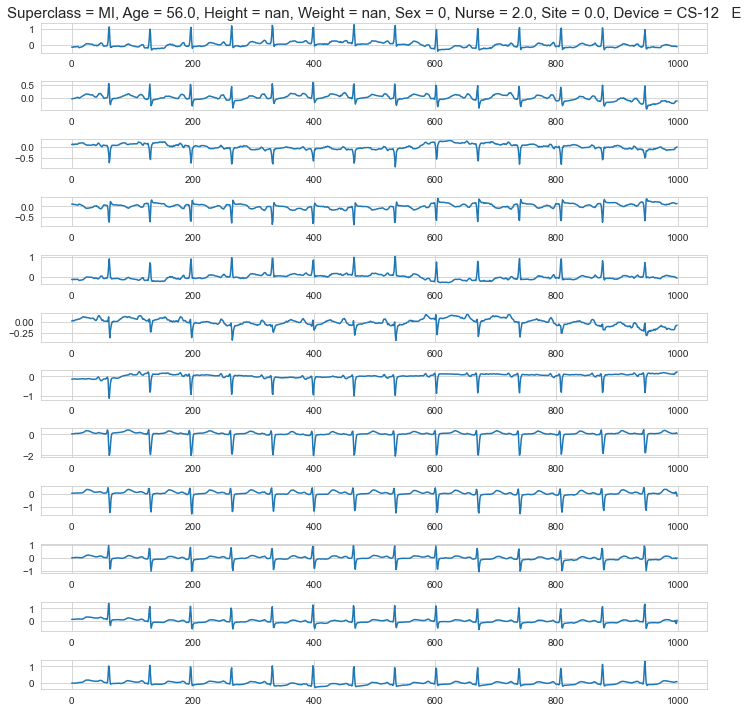

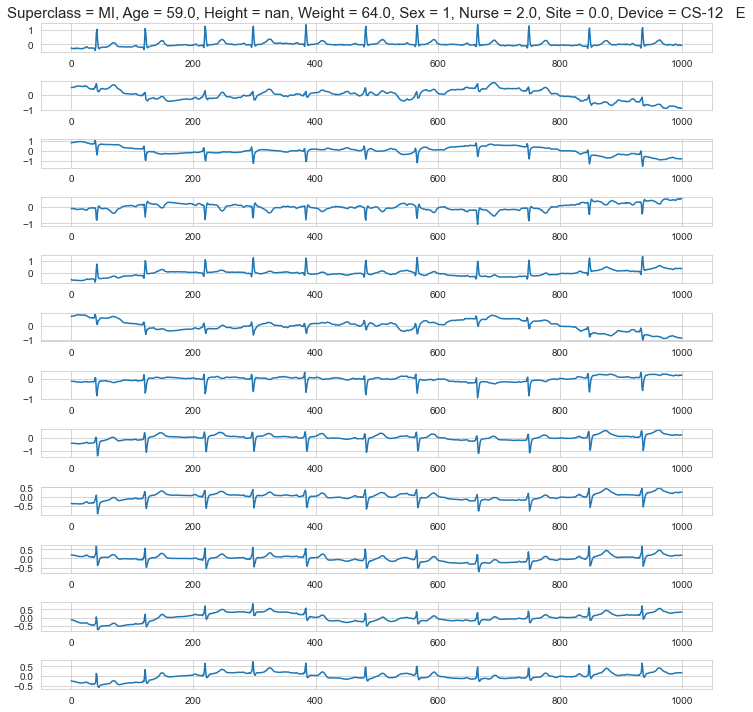

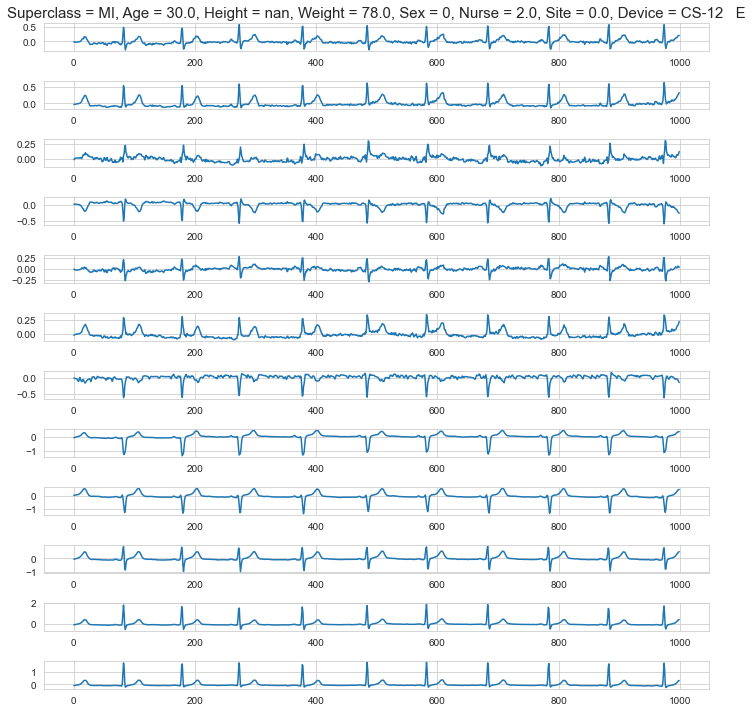

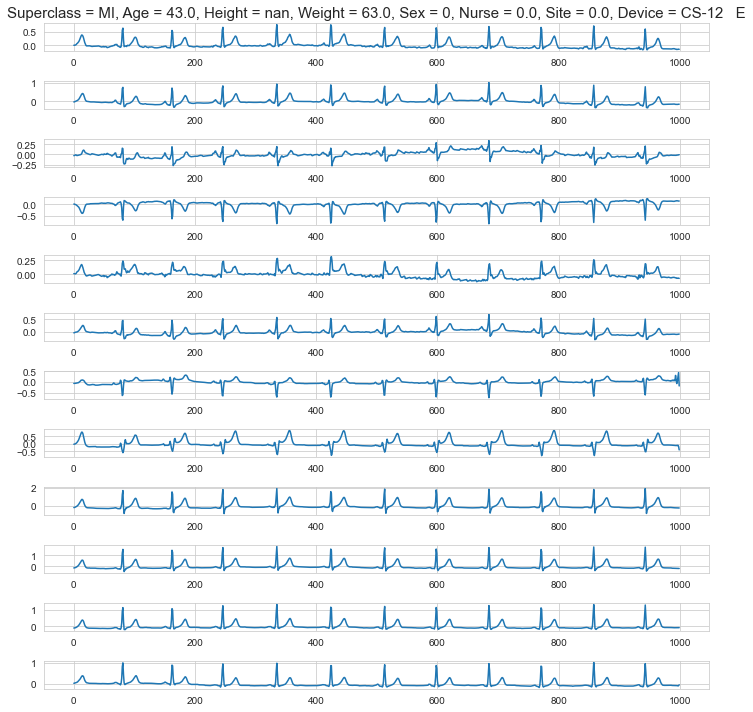

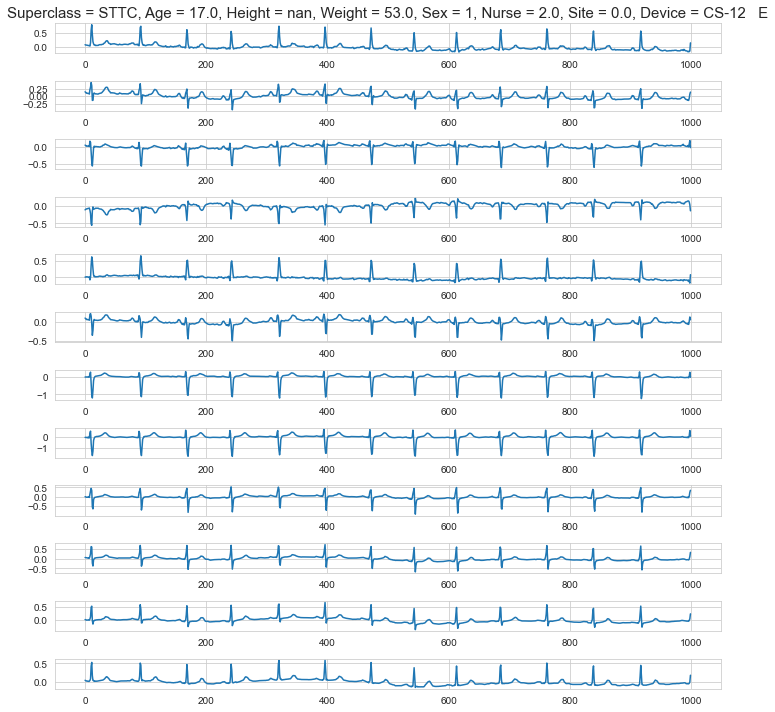

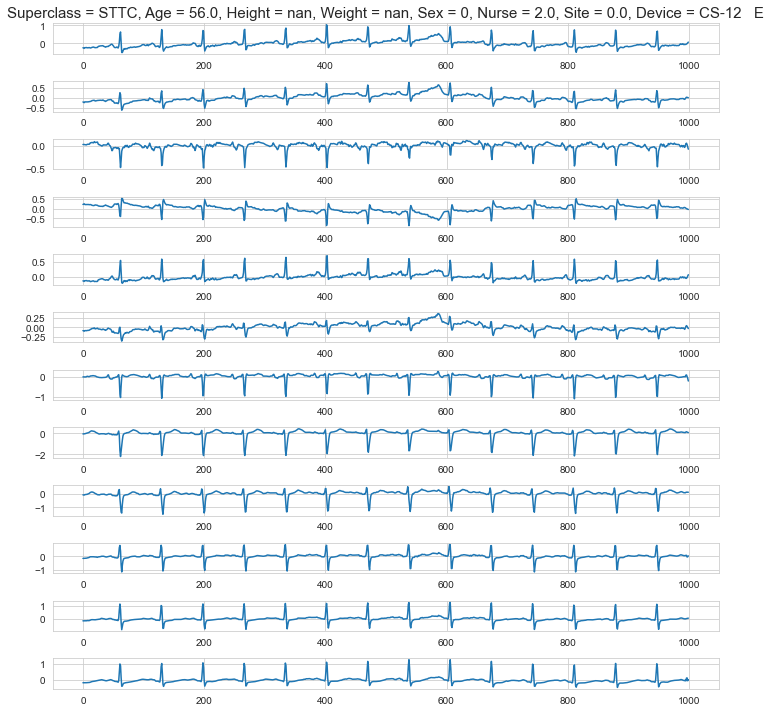

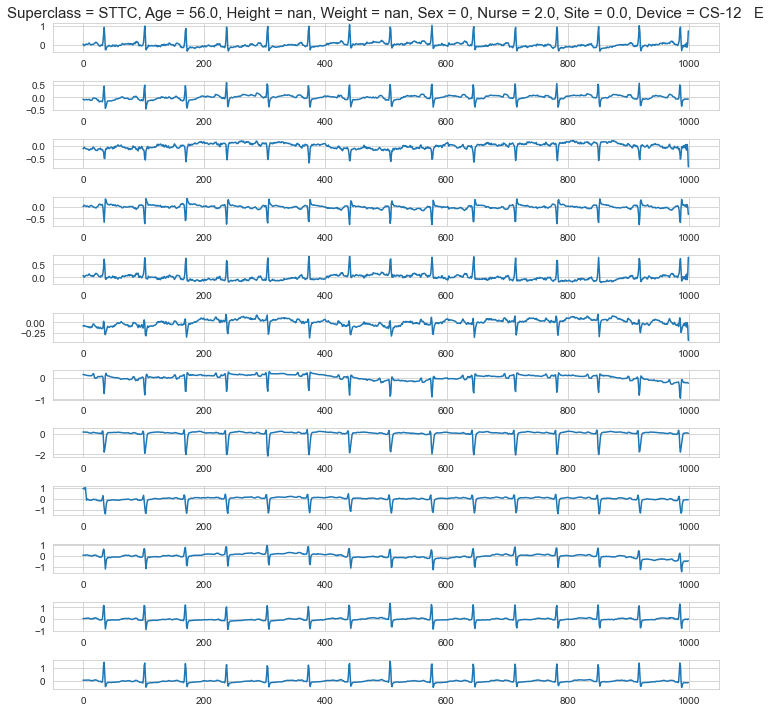

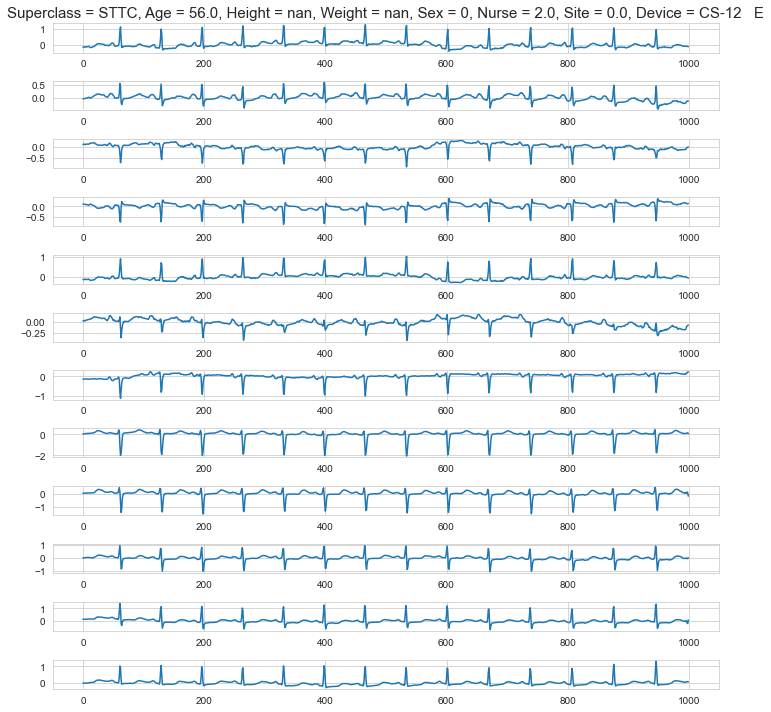

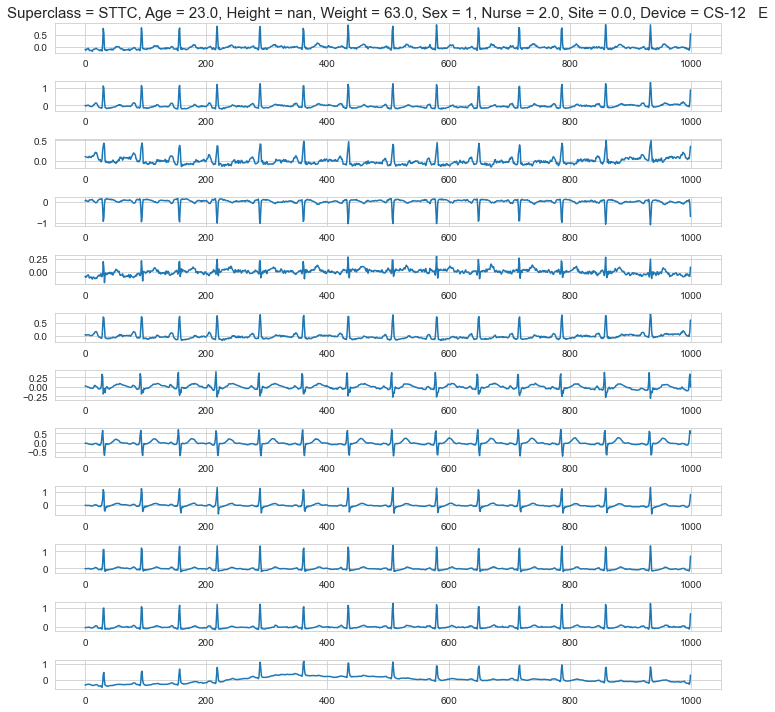

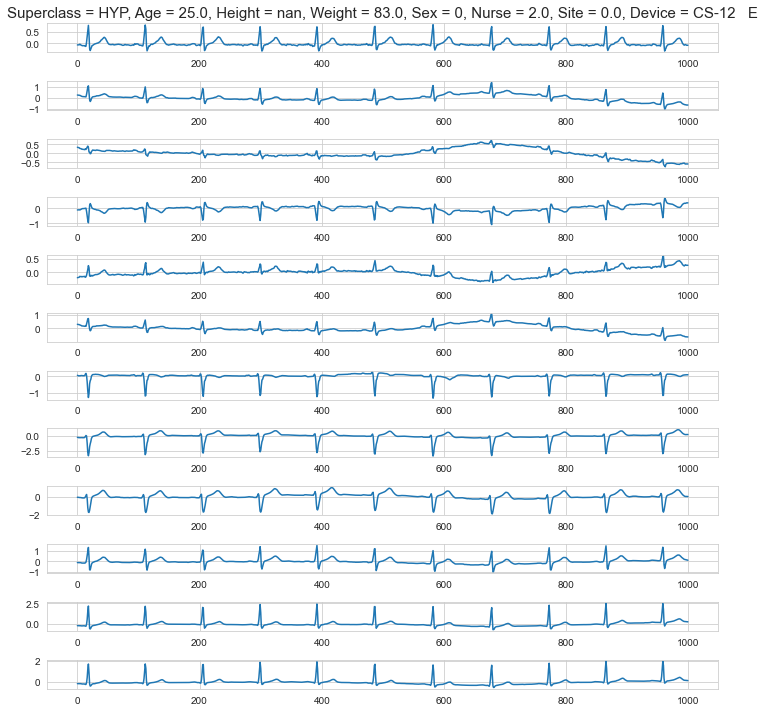

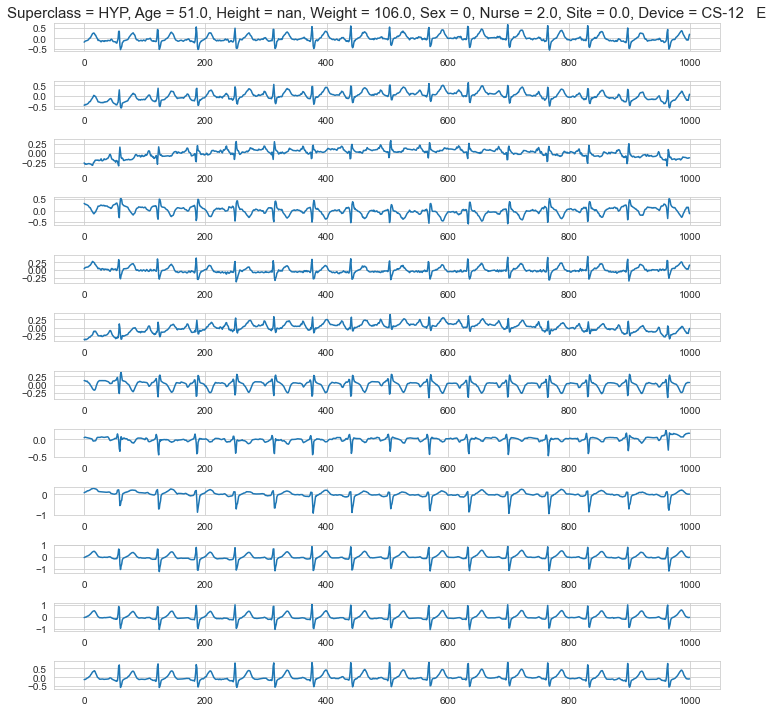

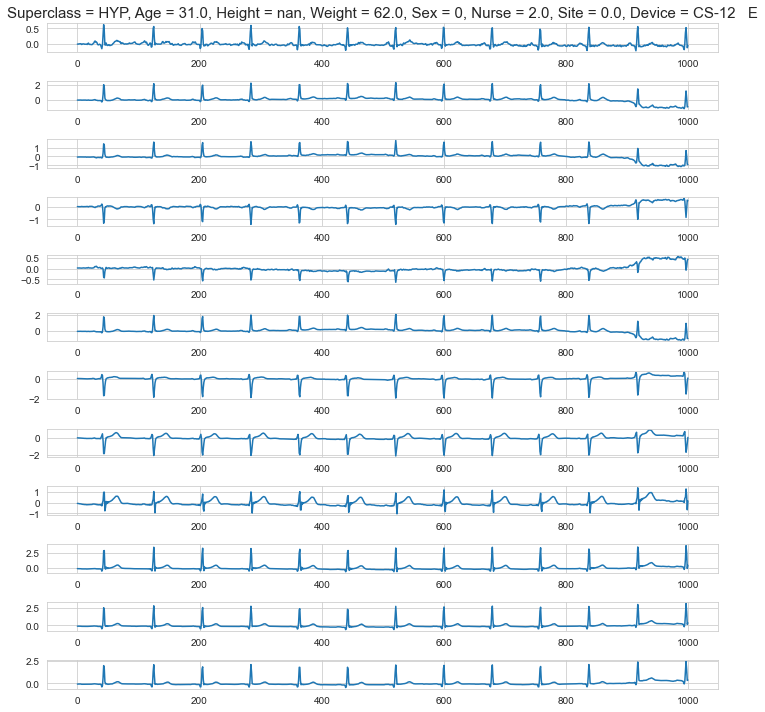

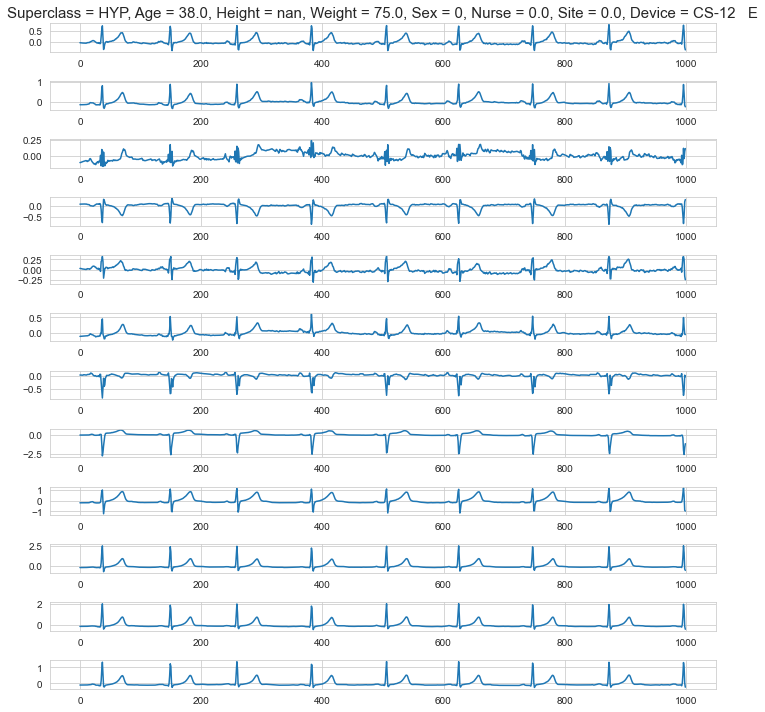

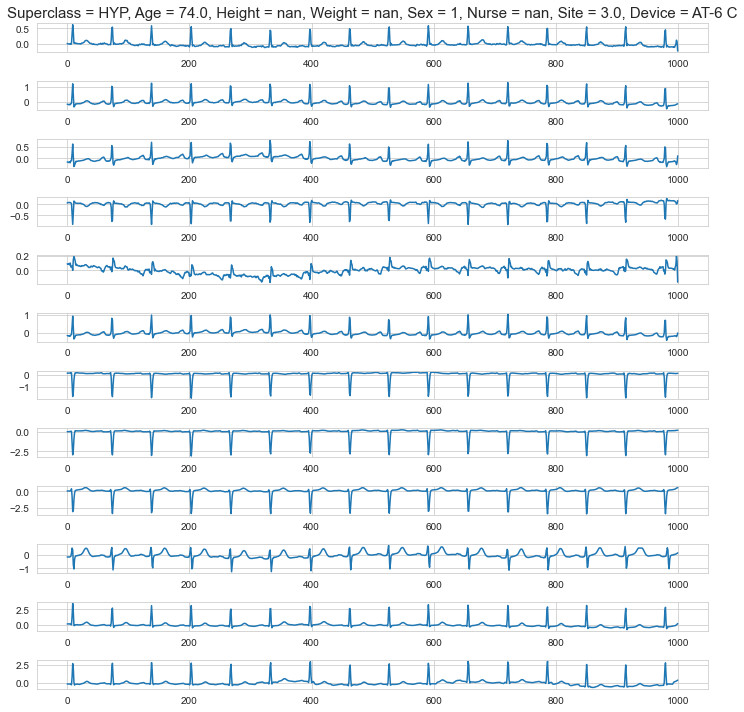

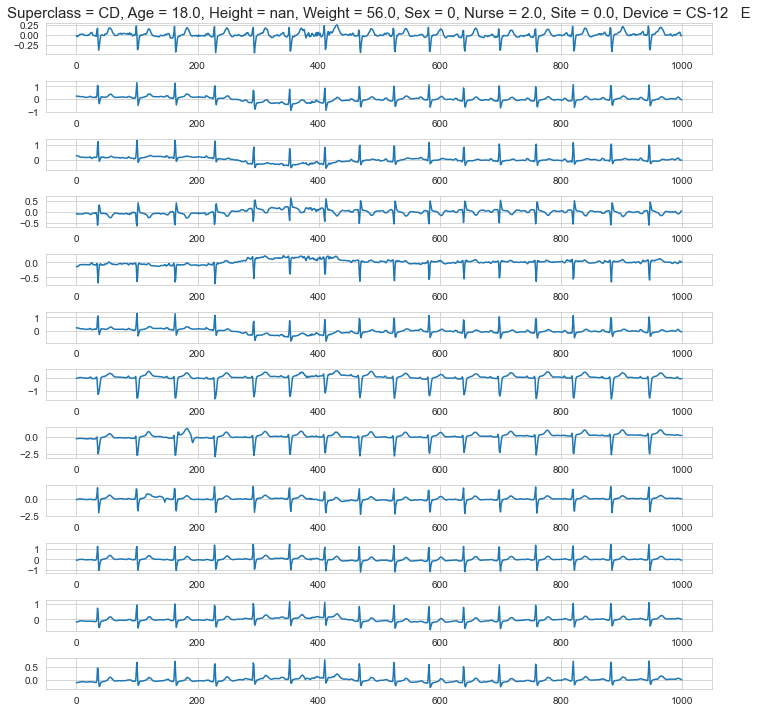

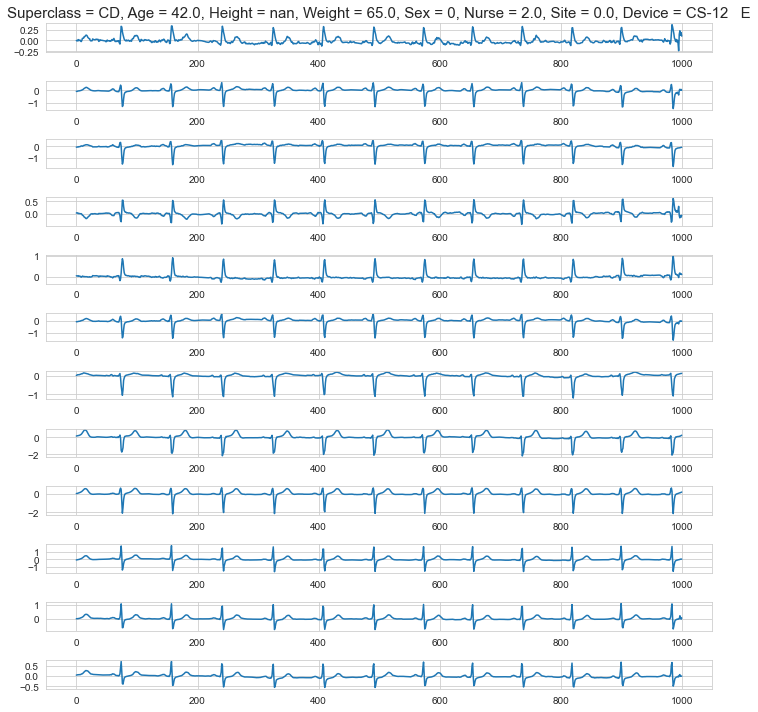

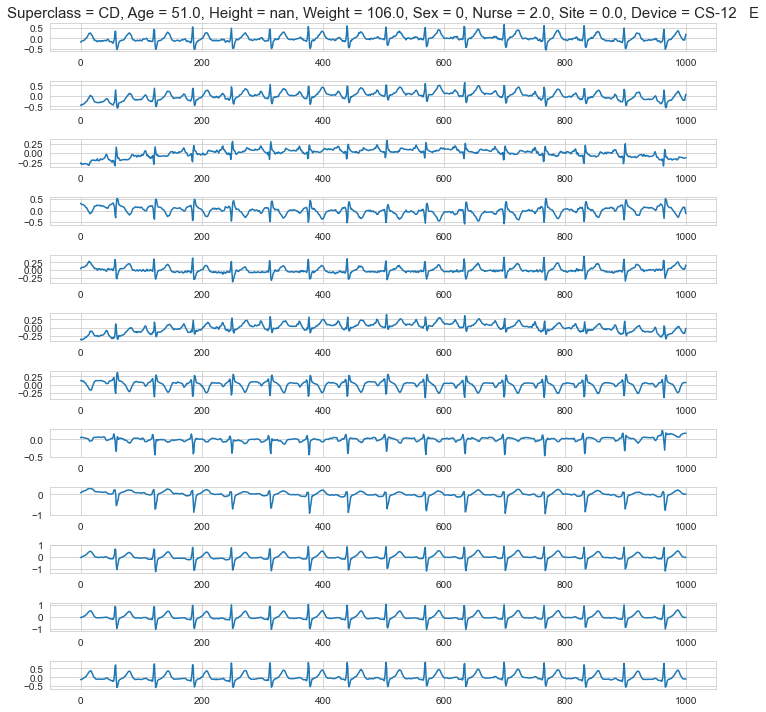

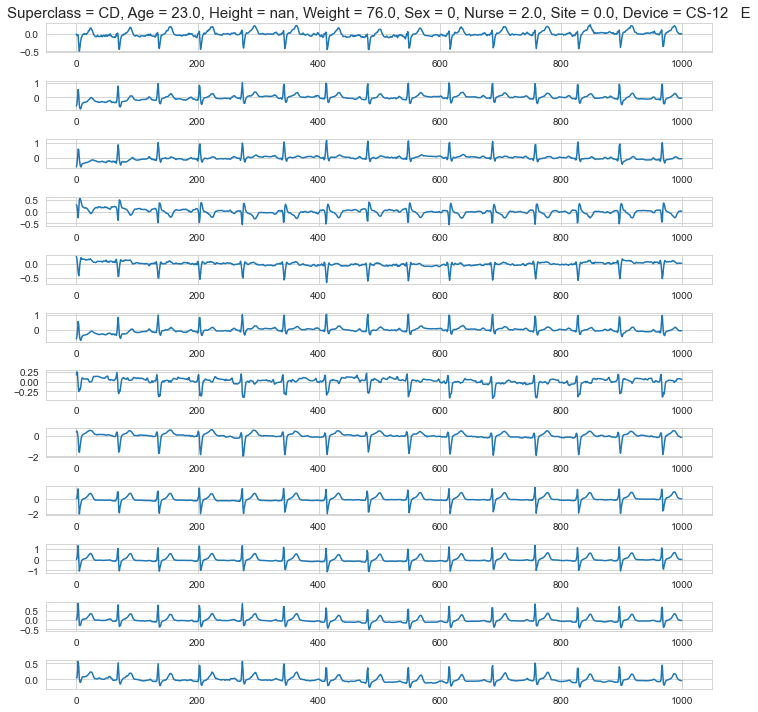

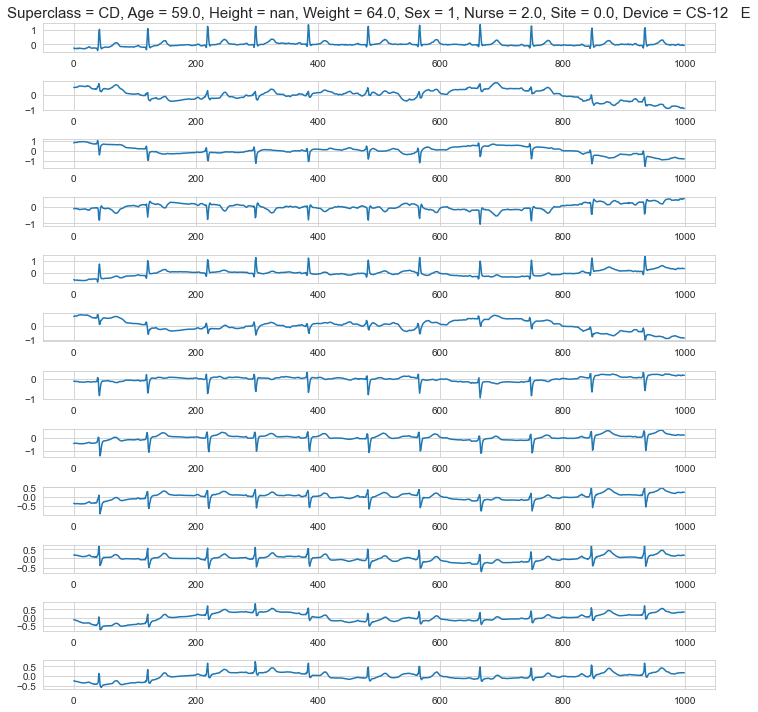

In [26]:
sample_num = 5

for superclass in superclass_cols:
    filt = y_all[superclass] == 1
    y_selected = y_all.loc[filt]
    x_selected = x_all[filt]
    
    for i in range(sample_num):
        y_ = y_selected.iloc[i]
        x_ = x_selected[i]
        
        #display(y_)
        #print(y_.shape, x_.shape); assert False
        bar, axes = plt.subplots(x_.shape[1], 1, figsize=(10,10))
        title = "Superclass = {}, Age = {}, Height = {}, Weight = {}, Sex = {}, Nurse = {}, Site = {}, Device = {}".format(superclass, 
                                                                                                                           y_['age'], y_['height'], y_['weight'],
                                                                                                                           y_['sex'], y_['nurse'], y_['site'], y_['device'],)
        axes[0].set_title(title, fontsize=15)
        
        for c in np.arange(x_.shape[1]):
            sns.lineplot(x=np.arange(x_.shape[0]), y=x_[:, c], ax=axes[c])
        
        plt.tight_layout()
        plt.show()
        #assert False

In [ ]:
x_train, y_train = get_data_by_folds(np.arange(1, 9), X, Y, update_cols, meta_cols)
print('data shape', x_train.shape)
y_train

In [ ]:
x_valid, y_valid = get_data_by_folds([9], X, Y, update_cols, meta_cols)
print('data shape', x_valid.shape)
y_valid

In [ ]:
x_test, y_test = get_data_by_folds([10], X, Y, update_cols, meta_cols)
print('data shape', x_test.shape)
y_test

In [ ]:
id_cols = ['ecg_id']
channel_cols = ['channel-{}'.format(i) for i in range(12)]

y_train.to_csv('train_meta.csv', index=True)
y_train_signal = pd.DataFrame(columns=id_cols+channel_cols, index=np.arange(y_train.shape[0]*1000), dtype=np.float32)

ecg_ids = []
signals = []
for i, ecg_id in enumerate(y_train.index.values):
    y_train_signal.loc[i*1000:(i+1)*1000-1, 'ecg_id'] = [ecg_id]*1000
    y_train_signal.loc[i*1000:(i+1)*1000-1, channel_cols] = x_train[i,:,:]

y_train_signal['ecg_id'] = y_train_signal['ecg_id'].astype(np.int)
y_train_signal.to_csv('train_signal.csv', index=False)

display(y_train) 
display(y_train_signal)

In [ ]:
y_valid.to_csv('valid_meta.csv', index=True)
y_valid_signal = pd.DataFrame(columns=id_cols+channel_cols, index=np.arange(y_valid.shape[0]*1000), dtype=np.float32)

ecg_ids = []
signals = []
for i, ecg_id in enumerate(y_valid.index.values):
    y_valid_signal.loc[i*1000:(i+1)*1000-1, 'ecg_id'] = [ecg_id]*1000
    y_valid_signal.loc[i*1000:(i+1)*1000-1, channel_cols] = x_valid[i,:,:]

y_valid_signal['ecg_id'] = y_valid_signal['ecg_id'].astype(np.int)
y_valid_signal.to_csv('valid_signal.csv', index=False)

display(y_valid) 
display(y_valid_signal)

In [ ]:
y_test.to_csv('test_meta.csv', index=True)
y_test_signal = pd.DataFrame(columns=id_cols+channel_cols, index=np.arange(y_test.shape[0]*1000), dtype=np.float32)

ecg_ids = []
signals = []
for i, ecg_id in enumerate(y_test.index.values):
    y_test_signal.loc[i*1000:(i+1)*1000-1, 'ecg_id'] = [ecg_id]*1000
    y_test_signal.loc[i*1000:(i+1)*1000-1, channel_cols] = x_test[i,:,:]

y_test_signal['ecg_id'] = y_test_signal['ecg_id'].astype(np.int)
y_test_signal.to_csv('test_signal.csv', index=False)

display(y_test) 
display(y_test_signal)